In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

sys.path.insert(0, '../..')

from src.keypoint import keypoint, utils

# Identifying keypoints with Harris & Stephens / Shi–Tomasi corner detection algorithms

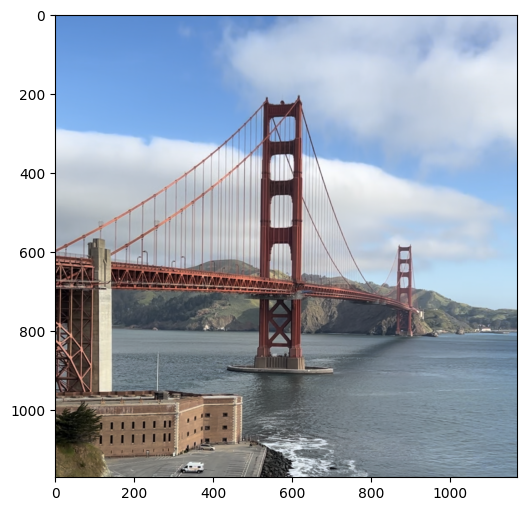

In [2]:
image = Image.open('../../images/bridge1.png')
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.show()

### Grayscale image

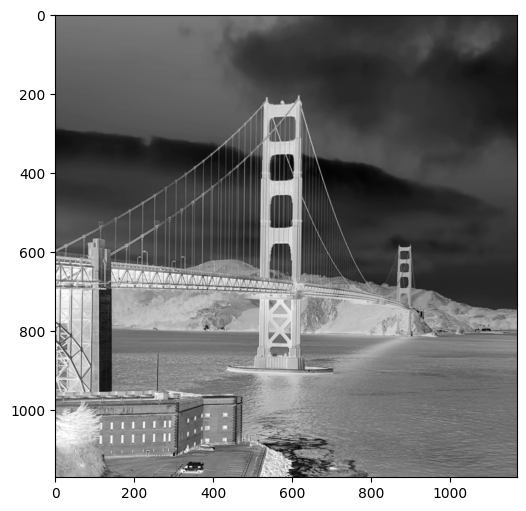

In [3]:
data = np.asarray(image, dtype="int32")
intensity = utils.rgb_to_intensity('../../images/bridge1.png')
plt.figure(figsize=(6, 6))
plt.imshow(intensity, cmap='binary')
plt.show()

### Keypoints

Applying the Harris & Stephens / Shi–Tomasi corner detection algorithm. Detected corners appear dark in the image.

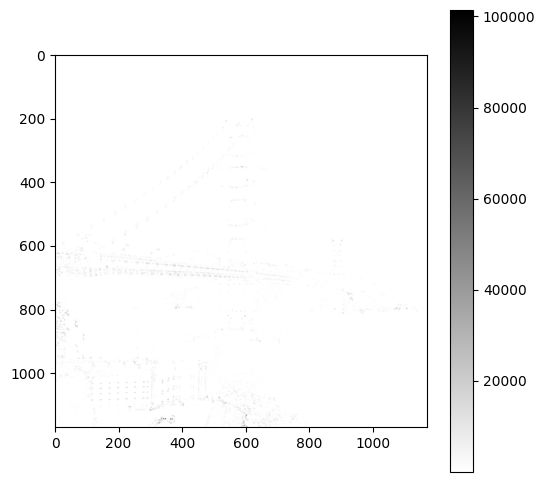

In [4]:
corner_scores = keypoint.corner_finder(
    intensity, 
    smoothing_variance=1.0,
)
plt.figure(figsize=(6, 6))
plt.imshow(corner_scores, cmap='binary')
plt.colorbar()
plt.show()

Typically a threshold is applied to filter out noise.

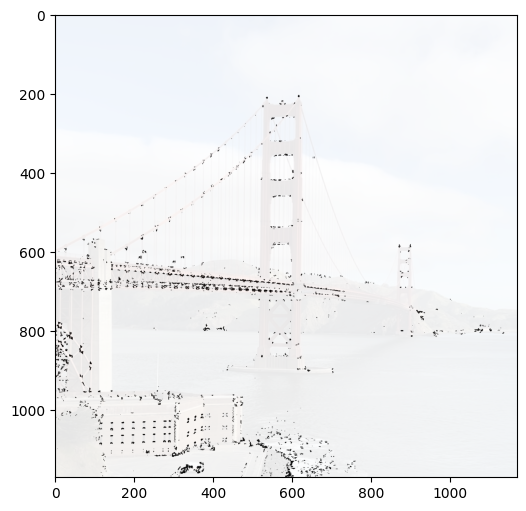

In [5]:
# thresholded corner scores
thresholded_corner_scores = np.where(corner_scores > 5000, 1, 0)
plt.figure(figsize=(6, 6))
plt.imshow(thresholded_corner_scores, cmap='binary')
plt.imshow(image, alpha=0.1)
plt.show()

Zooming in, we can see that corners are often comprised of several pixels. For simplicity, we apply a DFS to identify the pixel with the largest corner score in each blob. These pixels are the "key points" of the image.

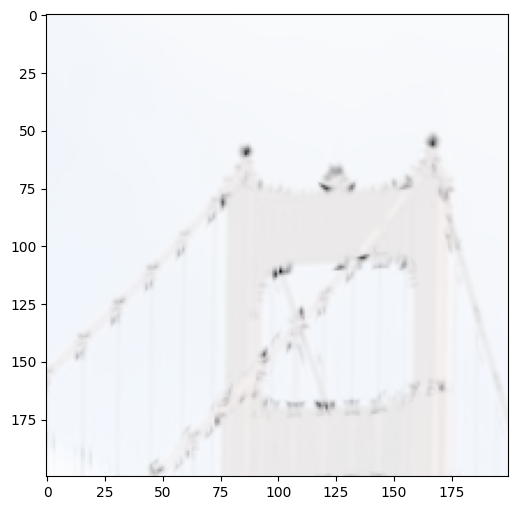

In [6]:
plt.figure(figsize=(6, 6))
plt.imshow(corner_scores[150:350,450:650], cmap='binary')
plt.imshow(np.asarray(image)[150:350,450:650,:], alpha=0.1)
plt.show()

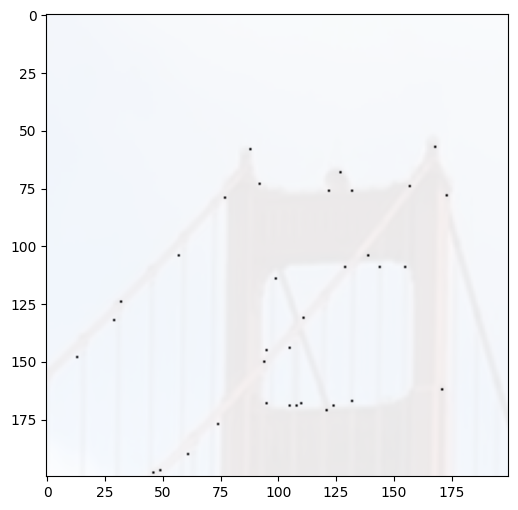

In [7]:
cleaned_thresholded_corners = utils.clean_image(thresholded_corner_scores)
plt.figure(figsize=(6, 6))
plt.imshow(cleaned_thresholded_corners[150:350,450:650], cmap='binary')
plt.imshow(np.asarray(image)[150:350,450:650,:], alpha=0.1)
plt.show()